<a href="https://colab.research.google.com/github/TimManh/Android_6_months/blob/master/StockPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Desc : this program uses an artificial recurrent neural network called LSTM
#       to predict the closing stock price of a corporation(AAPL) using the past 60 days stock price

In [2]:
#Import the librarise
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
#Get the stock quote
df = web.DataReader('SCO', data_source='yahoo', start='2012-01-01', end = '2020-05-20')
#Show the Data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,18.230000,17.719999,18.219999,17.780001,4459400.0,17.780001
2012-01-04,18.040001,17.535000,17.945000,17.695000,3283800.0,17.695000
2012-01-05,18.270000,17.625000,17.950001,18.184999,4008800.0,18.184999
2012-01-06,18.490000,18.020000,18.020000,18.135000,2486400.0,18.135000
2012-01-09,18.754999,18.245001,18.270000,18.285000,2245400.0,18.285000
...,...,...,...,...,...,...
2020-05-14,39.099998,34.660000,38.599998,35.610001,5297700.0,35.610001
2020-05-15,35.070000,32.380001,34.189999,32.650002,5052100.0,32.650002
2020-05-18,29.120001,26.350000,28.080000,27.750000,6649800.0,27.750000


In [4]:
#Get the number of rows and columns in the data set
df.shape

(2109, 6)

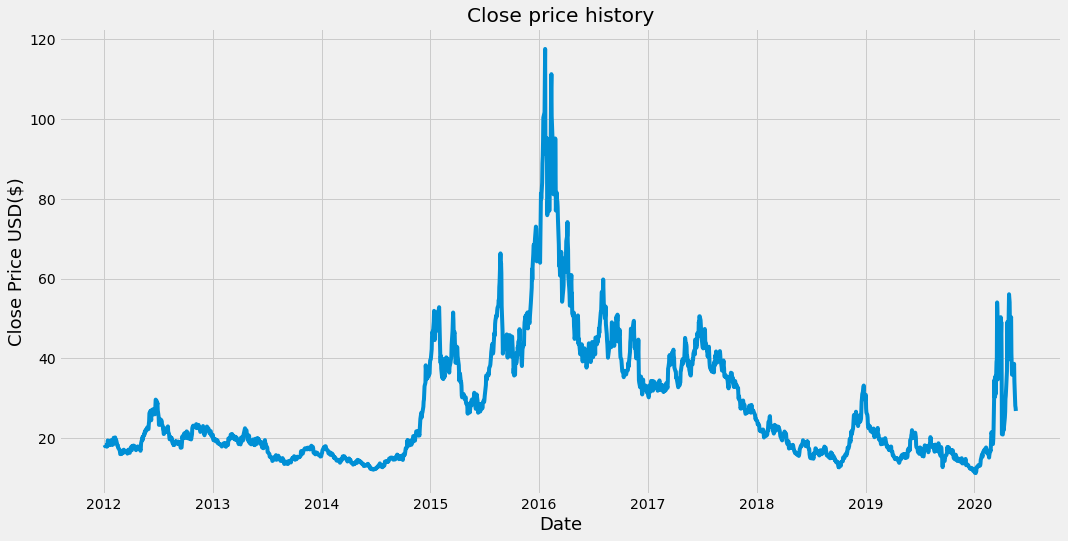

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['Open'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1688

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.06599605],
       [0.06341074],
       [0.06345775],
       ...,
       [0.15869136],
       [0.15427283],
       [0.14646988]])

In [8]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.06599605, 0.06341074, 0.06345775, 0.06411583, 0.06646612,
       0.06223559, 0.06632509, 0.06439785, 0.07699539, 0.07050861,
       0.06773527, 0.06590203, 0.07417505, 0.07539719, 0.07732443,
       0.07699539, 0.06660713, 0.07281188, 0.07591426, 0.0672652 ,
       0.07412804, 0.08324716, 0.08249507, 0.08131993, 0.08404625,
       0.07121369, 0.07102566, 0.07859359, 0.0697095 , 0.06505595,
       0.06510294, 0.06533797, 0.05950927, 0.05603084, 0.05283444,
       0.05227038, 0.04474946, 0.04493748, 0.04597161, 0.04977908,
       0.04752279, 0.04630065, 0.04865094, 0.05471468, 0.05518473,
       0.05001411, 0.04902699, 0.05109524, 0.0508132 , 0.05015512,
       0.05212937, 0.05170632, 0.0459246 , 0.04874495, 0.05062517,
       0.05518473, 0.05269343, 0.04902699, 0.04775783, 0.05306947])]
[0.05391557453085827]

[array([0.06599605, 0.06341074, 0.06345775, 0.06411583, 0.06646612,
       0.06223559, 0.06632509, 0.06439785, 0.07699539, 0.07050861,
       0.06773527, 0.06590203, 0.07

In [0]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [10]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1628, 60, 1)

In [0]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
1250/1628 [======================>.......] - ETA: 13s - loss: 0.0026

In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [0]:
#Convert the data to numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [0]:
#Get the models predicted price values
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [0]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(prediction-y_test)**2)
rmse

In [0]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = prediction
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Open'])
plt.plot(valid[['Open', 'Prediction']])
plt.legend(['Train', 'Val','Prediction'], loc='lower right')
plt.show()

In [0]:
#Show the valid and predicted prices
valid

In [0]:
#Get the quote
apple_quote = web.DataReader('SCO',data_source='yahoo',start='2012-01-01', end='2020-05-20')
#Create a new dataframe
new_df = apple_quote.filter(['Open'])
#Get the last 60 day closing price values and convert the data frame to an array
last_60_days = new_df[-60:].values
#Scale the data to be values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data sset to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [0]:
apple_quote2 = web.DataReader('SCO',data_source='yahoo',start='2020-05-21', end='2020-05-21')
print(apple_quote2['Close'])